<a href="https://colab.research.google.com/github/Hypersonichen/Compressible/blob/master/%CE%A6_Flow_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Φ<sub>Flow</sub> Playground

This notebook lets you experiment with [Φ-Flow](https://github.com/tum-pbs/PhiFlow).

[**Documentation**](https://tum-pbs.github.io/PhiFlow/)
&nbsp;&nbsp;&nbsp; [**API**](https://tum-pbs.github.io/PhiFlow/phi)
&nbsp;&nbsp;&nbsp; [**Demos**](https://github.com/tum-pbs/PhiFlow/tree/develop/demos)

In [1]:
# !pip install --upgrade --quiet phiflow  # Install stable release
!pip install --upgrade --quiet git+https://github.com/tum-pbs/PhiFlow@develop  # Install latest version, might be unstable

     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 1.0MB 8.8MB/s 
     |████████████████████████████████| 3.5MB 37.5MB/s 
     |████████████████████████████████| 194kB 49.8MB/s 
     |████████████████████████████████| 1.8MB 36.4MB/s 
     |████████████████████████████████| 358kB 49.9MB/s 


In [2]:
# from phi.flow import *
# from phi.tf.flow import *
from phi.torch.flow import *
# from phi.jax.flow import *

In [8]:
t = math.tensor([0,1])

In [9]:
type(t.native())

torch.Tensor

In [10]:
t1 = math.wrap(1)

In [11]:
type(t1)

phi.math._tensors.NativeTensor

In [14]:
test=math.random_normal(x=32, y=32)

In [15]:
test.shape

(x=32, y=32)

In [16]:
math.pi/32

0.09817477042468103

In [17]:
32/math.pi

10.185916357881302

In [24]:
test.x[0:10].y[:10].z[0]

(x=10, y=10) float32  -2.4650888 < ... < 2.7723463

In [19]:
t.numpy()

array([0, 1])

In [20]:
from phi.jax import JAX_BACKEND

In [23]:
with JAX_BACKEND:
  jax_tensor = math.tensor(t)
  print(type(jax_tensor.native()))

<class 'jax.interpreters.xla._DeviceArray'>


In [25]:
test.native('x,y')

tensor([[-0.1062, -0.1666,  1.1937,  ..., -0.7968, -0.9973, -0.1954],
        [-0.0250,  0.0817, -0.7057,  ..., -0.2638,  0.7199,  0.5312],
        [-0.2402,  0.6309, -0.5430,  ..., -0.7645,  0.1271,  1.8892],
        ...,
        [-1.5072, -0.7985,  0.9056,  ..., -0.2468,  2.3074, -0.4130],
        [ 0.3291,  0.3808, -0.7617,  ..., -0.1189, -0.0062,  0.0268],
        [-0.6028,  0.1265, -0.2823,  ...,  0.1716,  0.7902, -0.1439]])

In [26]:
math.join_dimensions(test, ['x', 'y'], 's')

(s=1024) float32  -2.6828732 < ... < 3.591998

In [28]:
math.expand_batch(test, 'batch', 10)

(batch=10, x=32, y=32), failed to fetch values with error Shape (x=32, y=32) does not contain dimension with name 'batch'

In [30]:
math.exp(test)

(x=32, y=32) float32  0.06836644 < ... < 36.30655

In [31]:
math.zeros(x=5)

(0.0, 0.0, 0.0, 0.0, 0.0) along x

In [33]:
t2=math.zeros(x=5) * math.ones(y=5)

In [34]:
type(t2)

phi.math._tensors.CollapsedTensor

In [35]:
CenteredGrid(t, Box[0:1, 0:1])

CenteredGrid[(vector=2), size=(1, 1) along vector, extrapolation=0]

In [56]:
d = Domain(x=32, y=32, bounds=Box[0:32, 0:32], boundaries=OPEN)

In [38]:
d.scalar_grid(0)

CenteredGrid[(x=32, y=32), size=(32, 32) along vector, extrapolation=0]

In [39]:
d.staggered_grid(0)

StaggeredGrid[(x=32, y=32, vector=2), size=(32, 32) along vector, extrapolation=0]

In [40]:
OPEN

{'accessible_extrapolation': 1,
 'active_extrapolation': 0,
 'near_vector_extrapolation': boundary,
 'scalar_extrapolation': 0,
 'vector_extrapolation': 0}

In [41]:
CLOSED

{'accessible_extrapolation': 0,
 'active_extrapolation': 0,
 'near_vector_extrapolation': 0,
 'scalar_extrapolation': boundary,
 'vector_extrapolation': boundary}

In [42]:
PERIODIC

{'accessible_extrapolation': 1,
 'active_extrapolation': 1,
 'near_vector_extrapolation': periodic,
 'scalar_extrapolation': periodic,
 'vector_extrapolation': periodic}

We can easily define our own bc

In [43]:
from phi.physics._boundaries import STICKY

In [44]:
STICKY

{'accessible_extrapolation': 0,
 'active_extrapolation': 0,
 'near_vector_extrapolation': 0,
 'scalar_extrapolation': boundary,
 'vector_extrapolation': 0}

In [45]:
d.scalar_grid(Noise())

/usr/local/lib/python3.7/dist-packages/phi/math/backend/_numpy_backend.py:232: RuntimeWarning:

overflow encountered in exp



CenteredGrid[(x=32, y=32), size=(32, 32) along vector, extrapolation=0]

In [46]:
d.scalar_grid(Sphere([0,0],1))

CenteredGrid[(x=32, y=32), size=(32, 32) along vector, extrapolation=0]

In [57]:
velocity = d.staggered_grid(Noise(vector=2))

/usr/local/lib/python3.7/dist-packages/phi/math/backend/_numpy_backend.py:232: RuntimeWarning:

overflow encountered in exp



the above overflow problem can be ignored

In [58]:
advect.mac_cormack(velocity, velocity, dt=1)

StaggeredGrid[(x=32, y=32, vector=2), size=(32, 32) along vector, extrapolation=0]

In [59]:
diffuse.explicit(velocity, 1.0, dt=1.0)

StaggeredGrid[(x=32, y=32, vector=2), size=(32, 32) along vector, extrapolation=0]

In [65]:
from phi.flow import *

In [134]:
for i in ModuleViewer().range():
  velocity = advect.mac_cormack(velocity, velocity, 1)
  velocity, _, _, _ = fluid.make_incompressible(velocity, d)
  velocity = diffuse.explicit(velocity, 0.1, 1)

AttributeError: ignored

In [61]:
from phi.field.plt import plot

(<Figure size 864x360 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bb19c2390>,
       dtype=object))

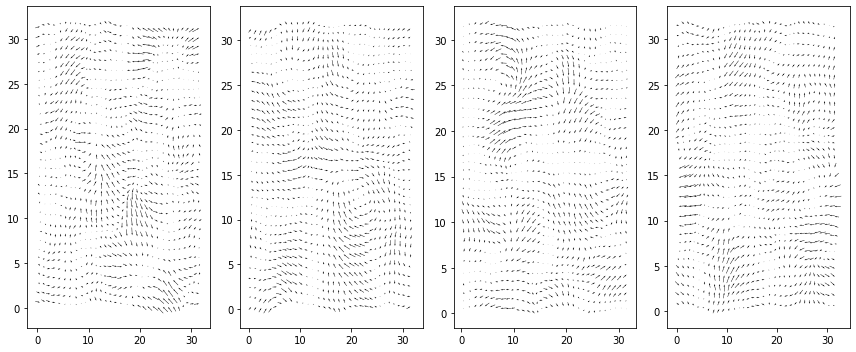

In [112]:
plot(velocity)

In [67]:
velocity

StaggeredGrid[(x=32, y=32, vector=2), size=(32, 32) along vector, extrapolation=0]

see here this is the "complex" staggered grid values:

In [68]:
velocity.values

(x=(33, 32) along vector, y=(32, 33) along vector, vector=2) float32  -1.9910662 < ... < 1.5109298

In [69]:
velocity.with_(values=math.sin(velocity.values))

StaggeredGrid[(x=32, y=32, vector=2), size=(32, 32) along vector, extrapolation=0]

In [71]:
velocity.at(d.scalar_grid())

CenteredGrid[(x=32, y=32, vector=2), size=(32, 32) along vector, extrapolation=0]

In [72]:
velocity >> d.scalar_grid()

CenteredGrid[(x=32, y=32, vector=2), size=(32, 32) along vector, extrapolation=0]

In [86]:
backend.default_backend()

PyTorch

In [85]:
#from phi.tf import TF_BACKEND
from phi.torch import TORCH_BACKEND
#from phi.jax import JAX_BACKEND
backend.set_global_default_backend(TORCH_BACKEND)

In [80]:
from phi.torch.flow import *

In [81]:
backend.default_backend()

TensorFlow

In [93]:
#@field.jit_compile
def simulate_step(velocity):
  velocity = advect.mac_cormack(velocity, velocity, 1)
  velocity, _, _, _ = fluid.make_incompressible(velocity, d)
  velocity = diffuse.explicit(velocity, 0.1, 1)
  return velocity




In [94]:

%timeit simulate_step(velocity)

10 loops, best of 5: 133 ms per loop


In [95]:
#TORCH_BACKEND.set_default_device('CPU')

In [97]:
math.tensor(0).numpy()

array(0)

In [116]:
scene = Scene.create("", batch=4) # save field and in the same directory

/usr/local/lib/python3.7/dist-packages/phi/field/_scene.py:182: UserWarning:

Failed to copy calling script to scene during Scene.create(): [Errno 2] No such file or directory: '<ipython-input-116-b2e332b0fe93>'



In [120]:
scene.write(velocity=velocity, frame=1)

In [104]:
import os

In [108]:
os.listdir(os.path.abspath("sim_000000"))

['velocity_000001.npz', 'src', 'velocity_000000.npz']

In [121]:
scene.read('velocity', frame=1)

StaggeredGrid[(batch=4, x=32, y=32, vector=2), size=(32, 32) along vector, extrapolation=0]

In [122]:
scene.put_properties(velocity=2)

In [111]:
velocity = d.staggered_grid(Noise(batch=4, vector=2))

/usr/local/lib/python3.7/dist-packages/phi/math/backend/_numpy_backend.py:232: RuntimeWarning:

overflow encountered in exp



In [123]:
# Domain doesn't have any dimension; just geometry not physics

In [125]:
scene.write(velocity=d.staggered_grid(Noise(vector=2)))

/usr/local/lib/python3.7/dist-packages/phi/math/backend/_numpy_backend.py:232: RuntimeWarning:

overflow encountered in exp



In [126]:
scene.read('velocity')

StaggeredGrid[(batch=4, x=32, y=32, vector=2), size=(32, 32) along vector, extrapolation=0]

In [128]:
field.assert_close(*scene.read('velocity').unstack('batch'))

In [131]:
#scene.read('velocity').unstack('batch')
scene.read('velocity').batch.unstack() # the same thing

(StaggeredGrid[(x=32, y=32, vector=2), size=(32, 32) along vector, extrapolation=0],
 StaggeredGrid[(x=32, y=32, vector=2), size=(32, 32) along vector, extrapolation=0],
 StaggeredGrid[(x=32, y=32, vector=2), size=(32, 32) along vector, extrapolation=0],
 StaggeredGrid[(x=32, y=32, vector=2), size=(32, 32) along vector, extrapolation=0])

In [130]:
math.random_normal(x=4, y=2).y.unstack()

((-1.6592879, 0.828752, 2.8571463, -1.7508237) along x,
 (-0.11548927, 0.23045056, -0.81321234, -0.87710017) along x)

In [133]:
phi.verify() # very useful command to check version

PhiFlow version 2.0.0rc1
Web interface: OK
TensorFlow: Installed, 0 GPUs available.
PyTorch: Installed, 0 GPUs available.
Jax: Installed, 0 GPUs available.


In [ ]:
import torch.optim s optim

backend.set_global_default_backend(TORCH_BACKEND)


#backend.set_global_precision

class Net()


net = Net().to(TORCH_BACKEND.get_default_device().ref)
optimizer = optim.Adam(net.parameters(), lr=1e-3)


for step in ModuleViewer().range():
  data = DOMAIN.vector_grid(Noise(batch=8, vector=2))

  optimizer.zero_grad()
  pred_tensor = net(data.values.native('batch, vector, x, y'))
  pred_tensor = math.wrap(pred_tensor, 'batch, vector, x, y')
  prediction = DOMAIN.vector_grid(pred_tensor)

  loss = field.l2_loss(field.divergence(prediction)) + field.l2_loss(prediction - data)
  loss.backward()
  optimizer.step()